In [1]:
#Practice project 3 : Red wine quality prediction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression


df=pd.read_csv('C:\ProgramData\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.shape

# there are 1599 rows and 12 columns in given dataset

(1599, 12)

In [3]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Above data shows that there 1599 rows and 12 columns ,all columns being of float datatype except quality column ,which is of integer type.All the values are not null in the dataset
#  In the data there is no catagroical variables to study but we have all numerical variables

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# checking missing values

df.isna().sum()

# below data shows ,there are no missing values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# checking null values in dataset

df.isnull().sum()

# below data shows ,there are no null values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

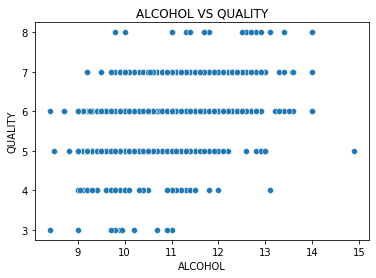

In [4]:
# plotting scatter plot for determing relation between alcohol vs quality 

plt.figure(figsize=(6,4))
sns.scatterplot(x='alcohol',y='quality',data=df)
plt.xlabel('ALCOHOL')
plt.ylabel('QUALITY')
plt.title("ALCOHOL VS QUALITY")
plt.show()

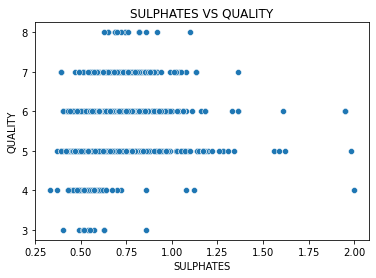

In [5]:
# plotting scatter plot for determing relation between sulphates vs quality 

plt.figure(figsize=(6,4))
sns.scatterplot(x='sulphates',y='quality',data=df)
plt.xlabel('SULPHATES')
plt.ylabel('QUALITY')
plt.title("SULPHATES VS QUALITY")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

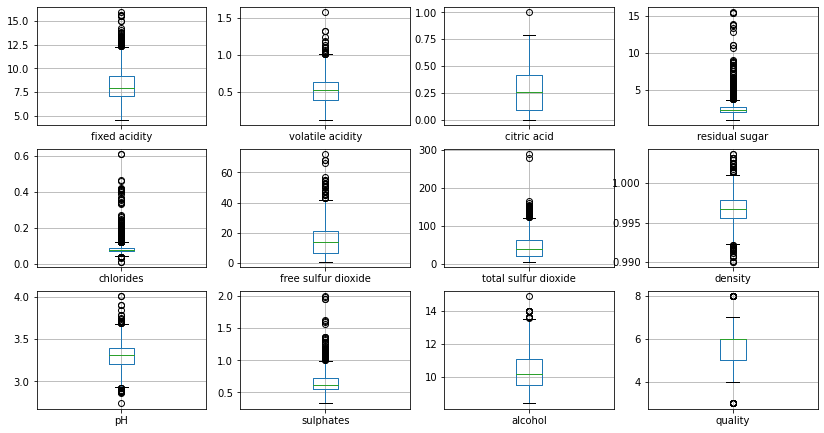

In [2]:
# checking skewness in dataset

df.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [3]:
# calculating value counts of quality variable

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#removing skewness keeping threshold +/-0.2


from sklearn.preprocessing import power_transform
x_new=power_transform(df)

df_new=pd.DataFrame(x_new,columns=df.columns)

df_new.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
quality                 0.012134
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

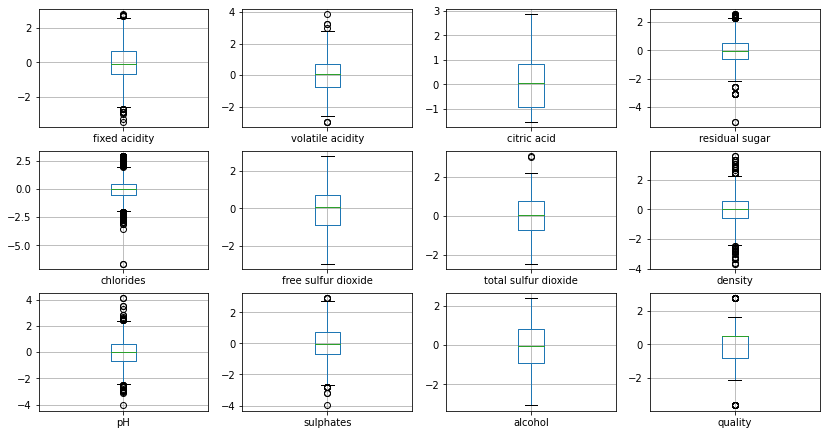

In [5]:
# checking outliers in features

df_new.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [ ]:
# Clearly from above except citric acid , free sulfur dioxide,alcohol ,rest of the independent variables have outliers

In [6]:
# Detecting outlier and removing it

import numpy as np

from scipy import stats
df_outlier= df_new.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

[[4.42665887e-01 9.95541630e-01 1.53110932e+00 ... 5.81649810e-01
  1.07502541e+00 7.77467217e-01]
 [1.61307687e-01 1.77129874e+00 1.53110932e+00 ... 3.95139954e-01
  5.00859609e-01 7.77467217e-01]
 [1.61307687e-01 1.26980139e+00 1.25535866e+00 ... 1.83771552e-01
  5.00859609e-01 7.77467217e-01]
 ...
 [1.36436736e+00 3.87059824e-04 6.83293826e-01 ... 8.20841495e-01
  7.34557526e-01 4.73370362e-01]
 [1.76745837e+00 7.28552768e-01 7.43826364e-01 ... 5.88343819e-01
  1.87998601e-02 7.77467217e-01]
 [1.66263981e+00 1.32045850e+00 1.03107021e+00 ... 2.56369273e-01
  7.34557526e-01 4.73370362e-01]]


In [7]:
# Defining threshold to identify an outlier

threshold = 3
print(np.where(z > 3))

(array([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  459,  469,  480,  517,  517,  544,  544,  554,  555,  557,
        608,  614,  690,  695,  695,  797,  832,  836,  836,  837,  837,
        889,  899,  909,  914, 1017, 1017, 1018, 1018, 1081, 1114, 1269,
       1270, 1287, 1299, 1299, 1316, 1316, 1321, 1321, 1369, 1374, 1374,
       1434, 1435, 1469, 1478, 1505, 1571], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  7, 11,  3,  7, 10, 11,
        8, 10,  7,  7,  7,  7,  8, 11,  4,  8,  4, 11,  4,  7,  4,  7,  7,
       11,  3,  3,  3,  7,  3,  7,  6,  7,  7,  7,  9,  1, 11,  3,  8,  3,
        8,  9,  3, 11,  7,  7, 11, 11, 11,  4], dtype=int64))


In [8]:
df_outlier=df_outlier[(z < 3).all(axis=1)]
df.shape

(1599, 12)

In [9]:
df_new.shape

(1599, 12)

In [10]:
df_outlier.shape

(1551, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

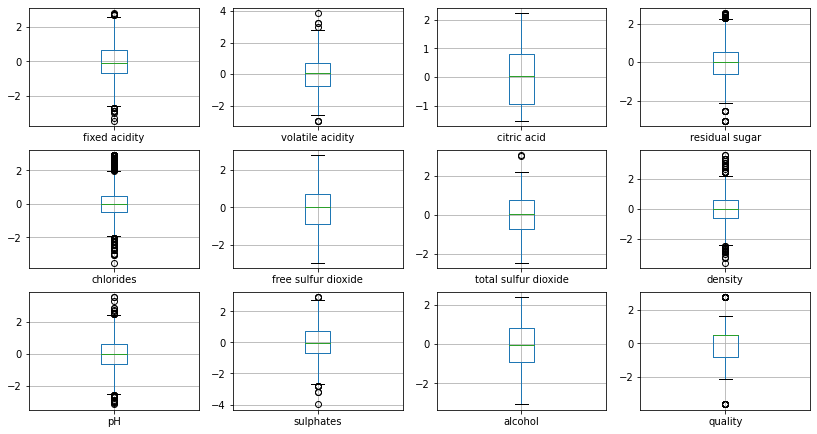

In [50]:
# Columns have reduced after removing outliers

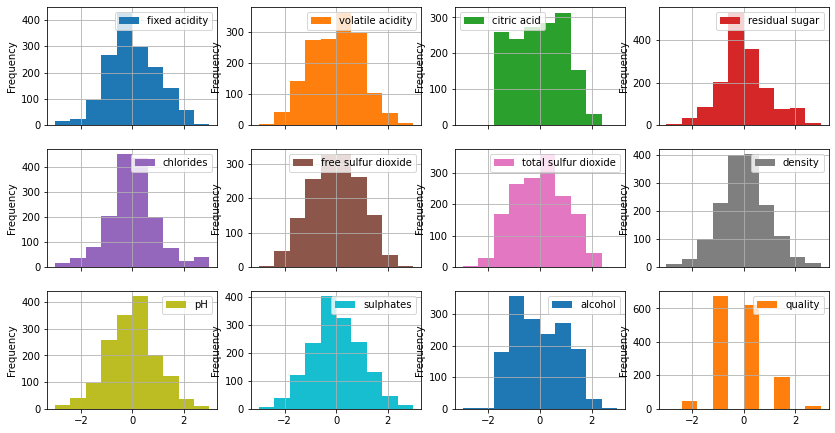

In [56]:
# checking  distribution of the independent features through histogram

df_outlier.plot(kind='hist', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show()

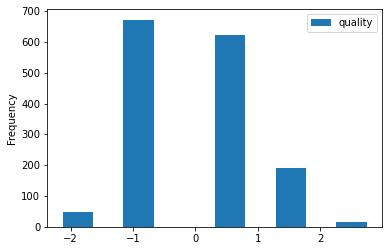

In [91]:
# checking the distribution of 'quality' variable

df_outlier.plot(kind='hist',y='quality')
plt.show()


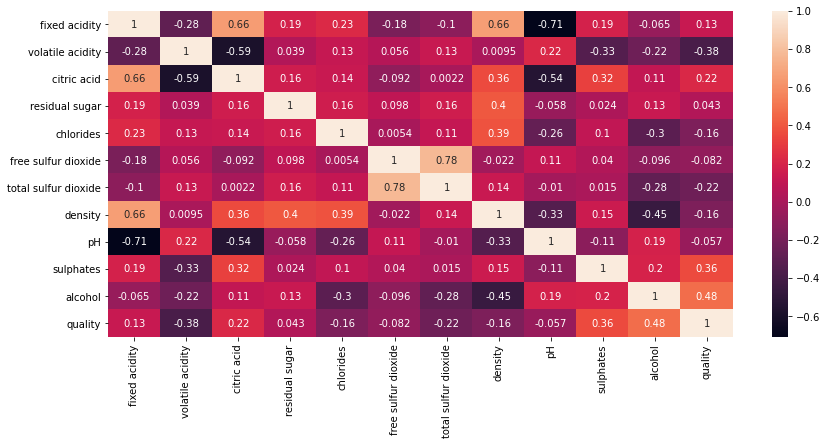

In [92]:
# checking correlation of independent variables with 'quality' variable

plt.figure(figsize=(14,6))
corr_matrix=df_outlier.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [93]:
corr_matrix['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.477809
sulphates               0.357977
citric acid             0.224656
fixed acidity           0.127369
residual sugar          0.042879
pH                     -0.056837
free sulfur dioxide    -0.082073
density                -0.163134
chlorides              -0.163975
total sulfur dioxide   -0.221174
volatile acidity       -0.380586
Name: quality, dtype: float64

In [17]:
# Above data clearly shows that alcohol , sulphates,citric acid are most correlated to quality variable and 
#volatile acidity , chlorides are least correlated to quality variable


In [11]:
# Defining a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher,
#and if it had a score of less than 7, it was deemed ‘bad quality’.

# Creating Classification version of target variable

df_outlier['goodquality'] = [1 if x >=0 else 0 for x in df_outlier['quality']]

In [13]:
# Separating feature variables and target variable

X = df_outlier.drop(['quality','goodquality'], axis = 1)
y = df_outlier['goodquality']

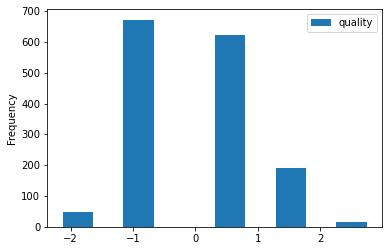

In [14]:
# checking the distribution of 'quality' variable with dataframe after removign outliers

df_outlier.plot(kind='hist',y='quality')
plt.show()

In [15]:
# Getting result of good vs bad wines

df_outlier['goodquality'].value_counts()

#Below count shows we have good proportion of good vs bad wines

1    830
0    721
Name: goodquality, dtype: int64

In [16]:
# Normalizing feature variables

from sklearn.preprocessing import StandardScaler
X_features =X
X = StandardScaler().fit_transform(X)

In [18]:
# Evaluation of models

#Training model with DecisionTreeClassifier and finding the best state,accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

model_dt = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    acc=accuracy_score(y_test,y_pred_dt)
    if acc>score_s:
        score_s=acc
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  12
best accuracy score :  0.7832618025751072


In [19]:
# Finding best accuracy score with best random state

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =12)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
acc=accuracy_score(y_test,y_pred_dt)
acc

0.776824034334764

In [20]:
# getting classification_report of DecisionTreeClassifier  model


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       217
           1       0.78      0.81      0.80       249

    accuracy                           0.78       466
   macro avg       0.78      0.77      0.77       466
weighted avg       0.78      0.78      0.78       466



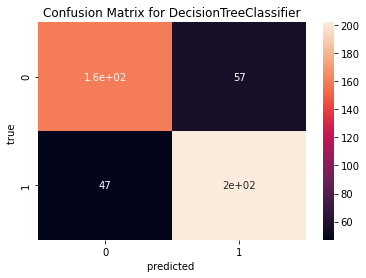

In [21]:
# confusion matrix of DecisionTreeClassifier  model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [27]:
# finding cross validation score

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.6421960297766749


In [32]:
#Training model with RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model_rfl = RandomForestClassifier(random_state=10)
model_rfl.fit(X_train, y_train)
y_pred_rfl = model_rfl.predict(X_test)

accuracy_score(y_test,y_pred_rfl)

0.8197424892703863

In [33]:
# getting classification_report of RandomForestClassifier model


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfl))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       217
           1       0.82      0.85      0.83       249

    accuracy                           0.82       466
   macro avg       0.82      0.82      0.82       466
weighted avg       0.82      0.82      0.82       466



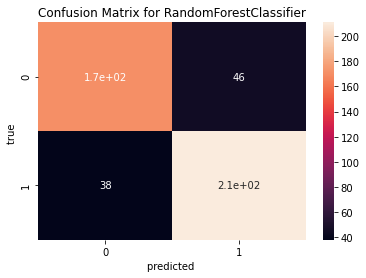

In [34]:
# confusion matrix of RandomForestClassifier model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rfl)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [35]:
# finding cross validation score

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv = 10).mean()
print(accuracy)


0.7260463192721256


In [ ]:
# RandomForestClassifier model is giving a good accuracy score.

In [41]:
# HyperParameterTuning

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['ginni','entropy']}

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,y_train)
GCV.best_params_  # Printing the best parameter found by GridSearchCV


GCV_pred=GCV.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy


0.8090128755364807

In [ ]:
# Final accuracy_score clearly states that RandomForestClassifier model is very good enough to predict red wine quality

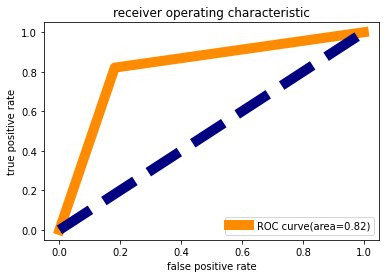

In [42]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_rfl,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of RandomForestClassifier model for predicting red wine quality

In [146]:
# Exporting the model through pickle

import pickle
filename='red_wine.pkl'
pickle.dump(model_rfl,open(filename,'wb'))

In [147]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(model_rfl.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
461,1,1
462,0,1
463,0,0
464,1,1
